In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [4]:
# Download stock data (Apple in this example)
stock_data = yf.download('AAPL', start='2023-01-01', end='2025-01-01')

# Show the first few rows of the data
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.632515,129.395502,122.742858,128.782633,112117500
2023-01-04,124.907707,127.181276,123.642420,125.431615,89113600
2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700
2023-01-06,128.130219,128.792516,123.454587,124.561717,87754700
2023-01-09,128.654114,131.876655,128.397108,128.970443,70790800


In [5]:
# Example headlines
headlines = [
    "Apple stock rises after new product launch",
    "Apple faces supply chain issues amid global shortage",
    "Apple announces strong quarterly results"
]

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment
sentiment_scores = [analyzer.polarity_scores(headline)['compound'] for headline in headlines]

# Display results
for headline, score in zip(headlines, sentiment_scores):
    print(f"Headline: {headline}\nSentiment Score: {score}\n")


Headline: Apple stock rises after new product launch
Sentiment Score: 0.0

Headline: Apple faces supply chain issues amid global shortage
Sentiment Score: -0.25

Headline: Apple announces strong quarterly results
Sentiment Score: 0.5106



In [6]:
# Moving Average (50-day)
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

# Relative Strength Index (RSI) Calculation
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()

rs = average_gain / average_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Display updated data
stock_data[['Close', 'MA50', 'RSI']].tail()


Price,Close,MA50,RSI
Ticker,AAPL,,
Date,,,
2024-12-24,257.916443,235.564016,76.180657
2024-12-26,258.735504,236.071997,76.812079
2024-12-27,255.309296,236.552763,69.300685
2024-12-30,251.923019,236.958420,58.382055
2024-12-31,250.144974,237.271641,53.982582


In [7]:
# Example: Assign sentiment score for each day (you can align this with actual data)
stock_data['Sentiment'] = np.random.uniform(-1, 1, size=(len(stock_data)))  # Replace with real sentiment


In [8]:
# Features (use more as needed)
X = stock_data[['MA50', 'RSI', 'Sentiment']]  # Add more features as needed
y = stock_data['Close']  # Predicting the closing price

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize and train RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate model
score = model.score(X_test, y_test)
print(f'Model R-squared: {score}')


C:\Users\malle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model R-squared: 0.9854181149720534


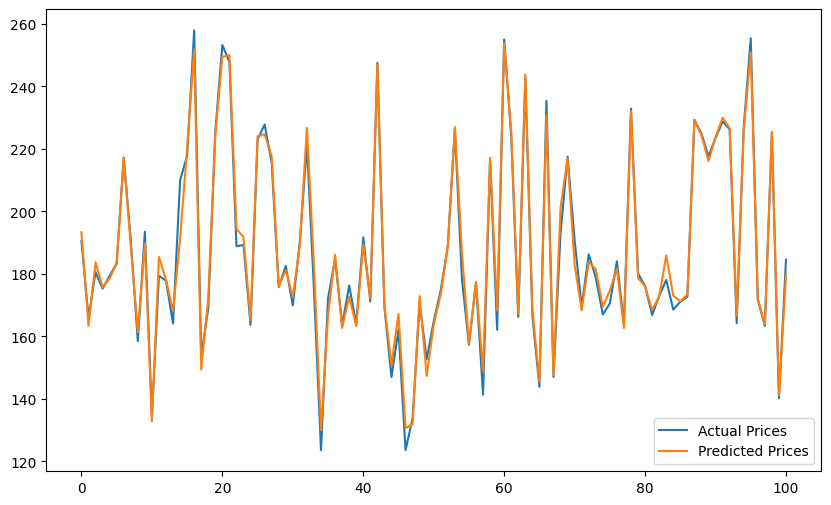

In [14]:
# Predict on the test set
predictions = model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices")
plt.plot(predictions, label="Predicted Prices")
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")


Mean Squared Error: 14.224775634403438
R-squared: 0.9854181149720534


In [16]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 2.6056648707625865


In [17]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the tuned model
best_predictions = best_model.predict(X_test)

# Evaluate the best model
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)
print(f"Best Model - MSE: {best_mse}, R-squared: {best_r2}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\malle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model - MSE: 14.670776790968244, R-squared: 0.9849609170692879
